# PCA for PF Construction

In [2]:
from sklearn.decomposition import PCA
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sys
import os
sys.path.append(os.path.abspath("../app"))
from frame import Frame
data = Frame()
df = data.dataset()

Fetching and Merging...
Merging completed successfully!
Started prepocessing....
Completed prepocessing.


/home/ilse/code/Ilse-hutten/projectlewagon/stock-stat-replica/app/frame.py:62: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivoted.fillna(method='ffill', inplace=True)


In [4]:
df.set_index('date', inplace=True)


In [5]:
df

source_file,AAF,AAL,ABF,ADM,AHT,ALW,ANTO,AUTO,AV,AZN,...,SVT,TSCO,TW,ULVR,UTG,UU,VOD,WEIR,WPP,WTB
date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,NaN,NaN,NaN,NaN,NaN,2728.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,511.50,NaN,NaN,80.3587,NaN,NaN,NaN
2005-01-04,NaN,1132.1035,785.0,322.5000,81.7500,2732.0,1076.97,NaN,634.9998,1910.0,...,799.8025,318.0001,208.9332,519.25,287.9028,626.5673,81.3255,330.00,567.5,852.0000
2005-01-05,NaN,1133.0376,774.0,331.5000,80.5000,2721.0,1068.30,NaN,639.4998,1913.0,...,801.0304,315.0001,203.2402,515.00,287.9028,624.5923,80.7567,327.50,560.5,852.7500
2005-01-06,NaN,1152.6533,766.5,336.0000,82.0001,2735.0,1091.00,NaN,644.4998,1938.0,...,792.0255,318.7501,199.8244,512.50,282.2111,630.5173,80.7567,325.00,560.5,858.0800
2005-01-07,NaN,1143.3125,760.5,339.7527,83.4999,2735.0,1104.00,NaN,645.4998,1938.0,...,782.6112,319.7501,198.3063,509.50,280.3140,629.5298,82.1786,329.75,556.0,869.5678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-04,141.3,2301.0000,1851.0,2891.0000,4404.0000,1216.0,1710.00,780.4,533.8000,12064.0,...,2512.0000,388.7000,111.7000,4617.00,827.0000,976.2000,69.8200,2344.00,618.6,2526.0000
2025-03-05,142.2,2408.0000,1853.5,2901.0000,4526.0000,1214.0,1820.50,772.0,541.8000,12062.0,...,2399.0000,379.0000,111.5500,4538.00,813.5000,944.4000,69.5400,2440.00,610.2,2547.0000
2025-03-06,142.7,2462.5000,1897.0,3046.0000,4575.0000,1220.0,1863.50,775.4,535.8000,12028.0,...,2370.0000,375.9000,110.2000,4538.00,792.5000,949.0000,69.6000,2480.00,630.6,2531.0000


In [5]:
# Create log returns to remove stationarity
log_returns = np.log(df / df.shift(1))

# Drop NaN values caused by the shift
log_returns = log_returns.dropna().drop(columns="FTSE100")

In [6]:
# Creating X of the closing prices (absolute prices)
X_abs = df.drop(columns="FTSE100").dropna()
stock_features = X_abs.columns
X_abs.shape

(786, 99)

In [7]:
# Creating X of the closing prices (log returns)
X_log = log_returns.copy()
stock_log_features = X_log.columns
X_log.shape

(785, 99)

In [8]:
# Preprocessing ABS (data must be centered around its mean before PCA)
scaler = StandardScaler()
scaler.fit(X_abs)
X_abs = pd.DataFrame(scaler.transform(X_abs), columns=stock_features)
X_abs

source_file,AAF,AAL,ABF,ADM,AHT,ALW,ANTO,AUTO,AV,AZN,...,SVT,TSCO,TW,ULVR,UTG,UU,VOD,WEIR,WPP,WTB
0,2.246578,1.259917,-0.143045,2.083012,0.422662,-0.698920,-0.806451,-0.023926,-0.153449,-2.712165,...,1.242932,0.310040,1.338321,-1.032139,0.941641,0.866546,1.884378,-0.435369,3.096827,0.223654
1,2.439685,1.244135,-0.132943,2.181218,0.577161,-0.632853,-1.069739,0.140983,-0.081135,-2.630913,...,1.393649,0.354911,1.471781,-0.940145,1.090638,0.875558,2.086634,-0.357264,3.259072,0.134450
2,2.233704,1.234490,-0.187782,1.950942,0.178897,-0.781504,-1.156369,-0.168723,-0.014177,-2.880235,...,1.087192,0.243856,1.387347,-0.882477,0.935911,0.524119,2.145084,-0.513474,3.101463,-0.016272
3,2.117840,1.245888,-0.349413,1.771461,-0.078601,-0.814538,-1.263383,-0.241122,-0.140057,-2.964826,...,0.886237,0.210203,1.221203,-0.850897,0.637917,0.010479,2.174773,-0.720346,3.305427,-0.130083
4,2.117840,1.351984,-0.274370,1.906918,-0.197051,-0.748471,-1.241301,-0.241122,-0.030247,-2.891365,...,0.700353,0.117097,1.262058,-0.731441,0.523304,-0.034577,2.322291,-0.716124,3.198809,0.017564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,1.235982,-0.545459,-0.446103,1.541185,-1.115461,1.150970,0.377496,1.029880,2.500763,1.244698,...,-0.721407,2.300045,-0.829722,1.351471,-1.511079,-1.049243,-0.812684,2.099868,-1.931825,-1.489662
782,1.293914,-0.357819,-0.438888,1.575049,-0.906029,1.134453,0.752894,0.945414,2.715028,1.242472,...,-1.289106,2.082423,-0.837893,1.134529,-1.665807,-1.622358,-0.825673,2.505168,-2.009703,-1.425067
783,1.326099,-0.262245,-0.313335,2.066080,-0.821913,1.184003,0.898977,0.979603,2.554329,1.204628,...,-1.434799,2.012874,-0.911432,1.134529,-1.906494,-1.539454,-0.822890,2.674043,-1.820572,-1.474282
784,1.499896,-0.404290,-0.257053,1.883213,-0.923195,1.051868,0.834429,1.049991,2.543616,1.253602,...,-1.319250,2.107102,-0.701709,1.324010,-1.814804,-1.373647,-0.688362,2.657156,-1.748257,-1.526574


In [9]:
# Preprocessing LOG (data must be centered around its mean before PCA)
scaler.fit(X_log)
X_log = pd.DataFrame(scaler.transform(X_log), columns=stock_log_features, index=log_returns.index)
X_log

source_file,AAF,AAL,ABF,ADM,AHT,ALW,ANTO,AUTO,AV,AZN,...,SVT,TSCO,TW,ULVR,UTG,UU,VOD,WEIR,WPP,WTB
date,,,,,,,,,,,,,,,,,,,,,
2022-02-02,0.910857,-0.089490,0.116853,0.505059,0.809090,0.786894,-2.524693,1.492020,0.404208,0.560785,...,0.722246,0.522942,0.883470,0.780968,0.777519,0.042411,2.125258,0.558245,0.850214,-0.542040
2022-02-03,-0.962520,-0.048305,-0.626069,-1.187447,-2.079046,-1.860816,-0.875027,-2.866231,0.370607,-1.862593,...,-1.425048,-1.387351,-0.525511,0.477075,-0.765996,-1.237933,0.633373,-1.196738,-0.744532,-0.936772
2022-02-04,-0.548081,0.093685,-1.884915,-0.943980,-1.391410,-0.437479,-1.101363,-0.698178,-0.750720,-0.663512,...,-0.945368,-0.442217,-1.069299,0.249341,-1.523328,-1.856020,0.341702,-1.616167,1.055872,-0.714541
2022-02-07,0.004681,0.725465,0.884466,0.716310,-0.648973,0.798468,0.209560,-0.011722,0.621426,0.518880,...,-0.885377,-1.190691,0.289262,1.001849,-0.583892,-0.155513,1.498819,0.008266,-0.486822,0.954652
2022-02-08,-4.290313,1.234050,0.555698,-0.785691,0.297176,-0.230161,0.277342,-0.822204,0.738428,-0.563875,...,0.554794,0.045846,0.341444,0.397259,-0.302311,0.771848,-0.036457,-0.854181,0.569220,1.035504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-04,-0.668202,-0.985832,-1.528865,-0.310872,-4.068141,-4.097709,-1.745549,-0.667056,-1.108155,0.893833,...,2.152807,2.276430,0.067718,1.517511,-0.090133,0.903430,-0.715166,-2.782024,-1.747164,-3.176027
2025-03-05,0.308649,1.801817,0.088630,0.185191,1.306948,-0.191312,2.663242,-0.690218,0.996462,-0.042342,...,-3.140930,-2.108322,-0.052891,-1.584939,-0.983641,-2.265160,-0.204561,2.192105,-0.698131,0.498850
2025-03-06,0.172722,0.895718,1.496220,2.598418,0.520898,0.473367,0.982532,0.263793,-0.777608,-0.226358,...,-0.817521,-0.701962,-0.636284,-0.023748,-1.575056,0.344586,0.098484,0.873350,1.819482,-0.357157


In [10]:
# Compute Principal Components
pca = PCA()
pca.fit(X_abs)

PCA()

In [11]:
# Access PCs
W = pca.components_
# Print PCs as COLUMNS
T = pd.DataFrame(W.T,
                 index=stock_features,
                 columns=[f'PC{i}' for i in range(1, pca.n_components_+1)])
T

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99
source_file,,,,,,,,,,,,,,,,,,,,,
AAF,-0.068186,0.126501,0.085981,-0.093777,-0.046245,-0.027539,-0.059841,-0.306278,-0.180440,-0.226273,...,-0.013329,-0.004319,0.001233,-0.027835,-0.002555,-0.011899,-0.005642,-0.007439,-0.014399,0.016450
AAL,-0.092053,0.131099,0.094240,0.051692,0.116477,-0.118328,0.070931,0.069320,-0.211456,0.076556,...,0.024127,-0.119197,-0.159974,-0.004810,-0.001063,-0.045621,0.037659,0.042479,0.014639,-0.045647
ABF,0.108333,0.010713,-0.196032,0.022049,0.022605,0.012740,0.064471,0.057566,-0.047011,-0.049994,...,0.088905,-0.053009,0.052719,0.049010,-0.077981,0.099010,0.068352,0.024821,0.000112,0.018539
ADM,0.097370,0.110999,-0.085082,-0.070942,-0.082891,-0.073779,0.097441,-0.019414,-0.073230,-0.075488,...,0.046444,-0.025090,0.027970,-0.002195,-0.001476,0.014227,0.013311,0.057662,0.013628,0.006662
AHT,0.094194,-0.002394,-0.088248,0.148437,0.023640,-0.119786,0.125420,0.226872,0.172577,0.061698,...,-0.073239,0.021503,0.009920,0.026856,-0.040806,-0.026366,-0.029129,-0.020687,0.005840,0.013609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UU,-0.014156,0.146937,-0.080749,0.049621,-0.001471,0.110475,-0.323681,0.287789,-0.094815,-0.004773,...,0.036244,-0.066889,0.003464,0.046451,-0.050620,0.069131,-0.009304,-0.063407,-0.020736,-0.017607
VOD,-0.118038,0.120597,0.062666,-0.059547,0.006263,0.022977,0.029834,-0.052735,-0.006905,-0.034709,...,0.325165,0.023235,0.066202,0.292791,0.069234,0.064487,0.056039,0.041747,0.087589,-0.038474
WEIR,0.133010,0.020224,0.025365,0.099538,-0.000327,-0.113056,-0.023014,0.032742,-0.031588,-0.012962,...,0.065323,0.026825,-0.006754,-0.047031,0.003361,0.006607,-0.000489,0.085993,0.012471,0.004476


In [12]:
# Compute Principal Components log returns
pca2 = PCA()
pca2.fit(X_log)

PCA()

In [13]:
# Access PCs
W2 = pca2.components_
# Print PCs as COLUMNS
T_log = pd.DataFrame(W2.T,
                 index=stock_log_features,
                 columns=[f'PC{i}' for i in range(1, pca2.n_components_+1)])
T_log

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99
source_file,,,,,,,,,,,,,,,,,,,,,
AAF,0.078133,-0.048561,-0.078777,-0.040733,-0.009151,-0.074236,0.053073,-0.089898,-0.042928,-0.077906,...,0.022846,-0.003976,0.025840,0.005340,-0.045332,0.015712,-0.015835,-0.008890,0.002685,-0.035300
AAL,0.069050,-0.196047,0.111968,-0.181531,-0.191176,-0.126468,-0.064139,0.032660,-0.040163,0.013565,...,-0.208625,0.077859,0.048006,-0.043695,0.035211,0.109283,0.002782,0.042888,-0.001717,0.058209
ABF,0.113276,-0.011530,-0.023429,0.028402,0.136271,-0.186065,0.129739,0.054435,-0.030012,0.007868,...,-0.052644,-0.082601,-0.024890,0.016708,-0.055849,-0.006484,0.007535,0.009973,0.009430,-0.019466
ADM,0.081498,0.008040,-0.053003,0.007823,0.024632,-0.028758,-0.008608,-0.260541,0.196853,-0.036668,...,0.028543,-0.001585,-0.092882,0.020613,-0.048152,0.012030,0.001485,0.035599,0.020556,0.016926
AHT,0.122256,-0.018593,0.125891,0.068540,-0.040646,0.032082,0.027230,0.033703,0.037940,-0.050906,...,0.142069,-0.003358,-0.152782,-0.029895,0.002408,-0.011033,-0.072385,0.042940,0.015344,0.006430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UU,0.072974,0.195834,-0.127046,-0.207091,-0.110334,-0.055130,-0.050799,0.110565,0.228385,0.065494,...,-0.057631,0.074924,0.097730,0.163441,0.046683,0.027890,-0.050821,-0.221820,-0.015403,0.600259
VOD,0.069552,-0.007688,-0.155689,-0.108490,0.056614,-0.121655,-0.026143,0.096758,-0.039842,-0.246311,...,-0.062204,-0.026178,0.053077,0.016095,-0.013225,-0.033279,0.016280,-0.020180,-0.017156,0.023237
WEIR,0.122218,-0.104858,0.096050,0.032212,-0.042941,-0.016787,0.051865,-0.042448,0.049313,0.018219,...,0.026854,0.009367,-0.016594,0.060103,0.067254,-0.127905,-0.011285,0.056393,-0.020118,0.003688


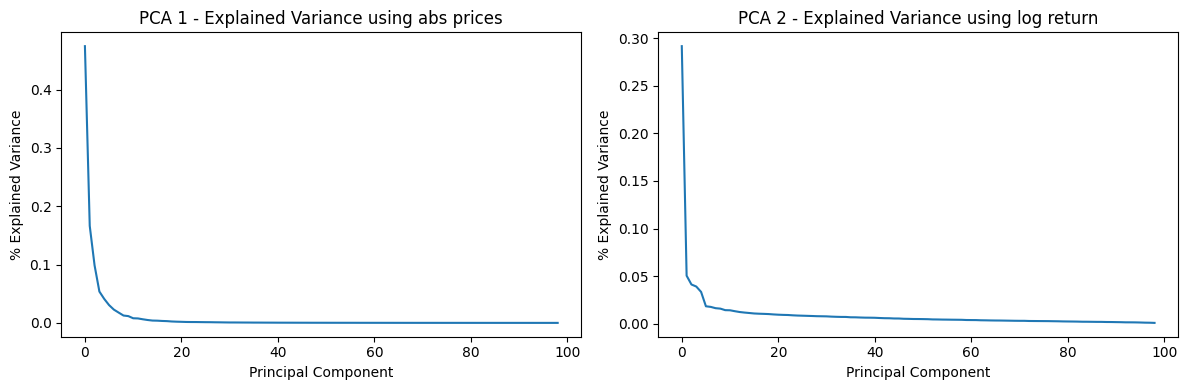

In [14]:
# pca.explained_variance_ratio_ and pca2.explained_variance_ratio_ (absolute vs log return)
explained_variance_1 = pca.explained_variance_ratio_
explained_variance_2 = pca2.explained_variance_ratio_

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first PCA - abs
axes[0].plot(explained_variance_1)
axes[0].set_title('PCA 1 - Explained Variance using abs prices')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('% Explained Variance')

# Plot the second PCA - log
axes[1].plot(explained_variance_2)
axes[1].set_title('PCA 2 - Explained Variance using log return')
axes[1].set_xlabel('Principal Component')
axes[1].set_ylabel('% Explained Variance')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

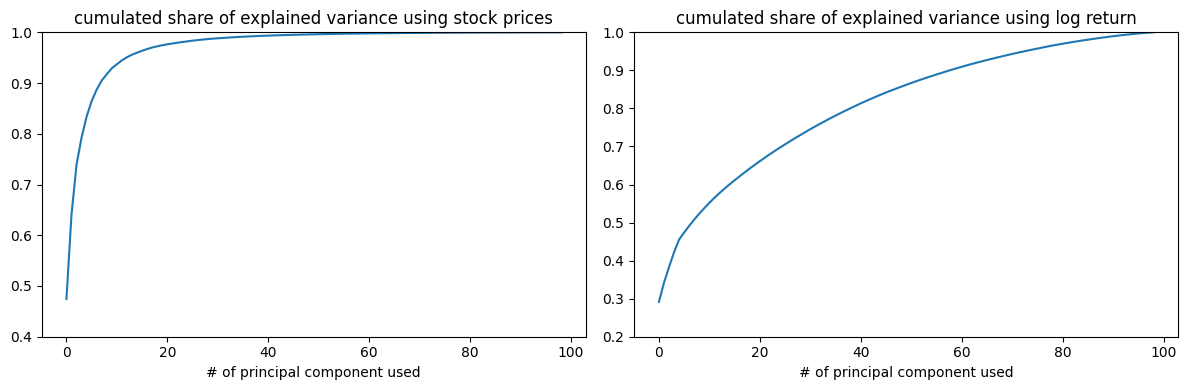

In [15]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# first PCA - ABS
axes[0].plot(np.cumsum(explained_variance_1))
axes[0].set_title('cumulated share of explained variance using stock prices')
axes[0].set_xlabel('# of principal component used')

# second PCA - log
axes[1].plot(np.cumsum(explained_variance_2))
axes[1].set_title('cumulated share of explained variance using log return')
axes[1].set_xlabel('# of principal component used')

# Adjust the y-axis scale
axes[0].set_ylim(0.4, 1.0)  # Adjust scale for subplot 1
axes[1].set_ylim(0.2, 1.0)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
# Picking stocks most closely mimicking the index (based on log returns method)

# Keeping only PC1 and PC2
T_log = T_log.iloc[:, :4]

# adding column showing cum PC1+PC2
T_log["PC_sum"] = T_log["PC1"]+T_log["PC2"]+T_log["PC3"]+T_log["PC4"]

# Sort by PC_sum
T_log_sorted = T_log.sort_values("PC_sum", ascending=False)
T_log_sorted = T_log_sorted.reset_index()
T_log_sorted.rename(columns={T_log_sorted.columns[0]: "Stocks" }, inplace = True)

# Calculate the sum of 'PC_sum' for the top 5 rows
top_5_sum = T_log_sorted["PC_sum"].head(5).sum()

# Add the 'pf_weights' column by dividing each stock's 'PC_sum' by the top 5 sum
T_log_sorted["pf_weights"] = T_log_sorted["PC_sum"] /top_5_sum
# Set weights to 0 for rows beyond the top 5
T_log_sorted.loc[5:, "pf_weights"] = 0

T_log_sorted.head(10)

/tmp/ipykernel_31504/1455366988.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T_log["PC_sum"] = T_log["PC1"]+T_log["PC2"]+T_log["PC3"]+T_log["PC4"]


,Stocks,PC1,PC2,PC3,PC4,PC_sum,pf_weights
0,HLMA,0.117053,0.103774,0.110943,0.138163,0.469934,0.219340
1,DPLM,0.120589,0.084592,0.123986,0.116007,0.445175,0.207784
2,SPX,0.118151,0.073121,0.138854,0.098127,0.428254,0.199886
3,EXPN,0.116525,0.107440,0.054858,0.139744,0.418568,0.195365
4,SGE,0.082109,0.077061,0.063120,0.158268,0.380557,0.177624
5,SMT,0.125202,-0.018412,0.143994,0.116656,0.367440,0.000000
6,HWDN,0.133664,0.076577,0.138581,-0.019924,0.328898,0.000000
7,CRDA,0.104173,0.096136,0.088289,0.031002,0.319601,0.000000
8,AUTO,0.119262,0.097290,0.051555,0.048228,0.316336,0.000000
9,RMV,0.106104,0.100018,0.081001,0.019268,0.306390,0.000000


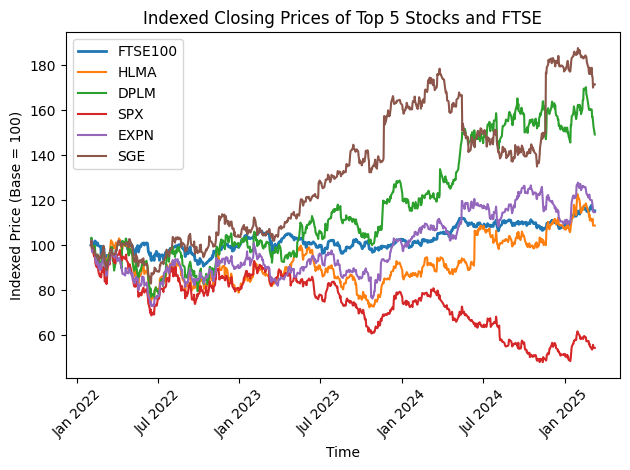

In [17]:
import matplotlib.dates as mdates
# Index the data by dividing each stock's prices by its first value
indexed_data = df / df.iloc[0] * 100

# Retrieve the top 5 stocks from the "Stocks" column of T_log_sorted
top_5_stocks = T_log_sorted["Stocks"].head(5)

# Plot the FTSE index
plt.plot(indexed_data["FTSE100"], label="FTSE100", linewidth=2)

# Plot each of the top 5 stocks dynamically
for stock in top_5_stocks:
    if stock in indexed_data.columns:  # Ensure the stock is in the data
        plt.plot(indexed_data[stock], label=stock)

# Add a legend to distinguish the lines
plt.legend()

# Format the dates on the x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Show dates every 1 month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Month Year"

# Add titles and labels
plt.title("Indexed Closing Prices of Top 5 Stocks and FTSE")
plt.xlabel("Time")
plt.ylabel("Indexed Price (Base = 100)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


(array([18993., 19113., 19236., 19358., 19478., 19601., 19723., 19844.,
        19967., 20089., 20209.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

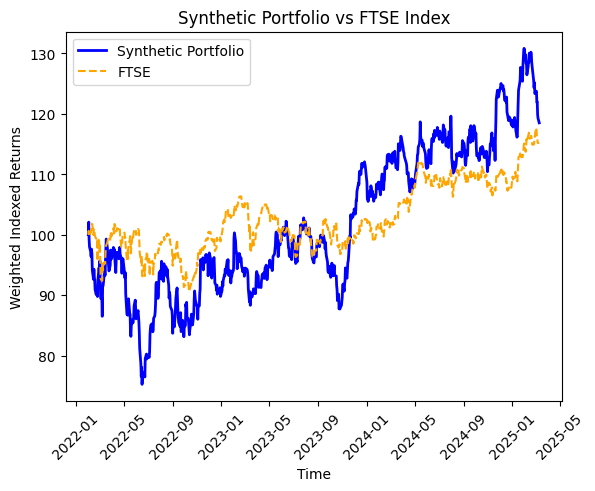

In [18]:
# Extract the top 5 stocks and their weights to make a replicating portfolio
top_5_stocks = T_log_sorted["Stocks"].head(5)
top_5_weights = T_log_sorted["pf_weights"].head(5)

# Calculate the weighted sumproduct (dot product of weights and indexed returns)
weighted_returns = (indexed_data[top_5_stocks] * top_5_weights.values).sum(axis=1)

# Plot the weighted returns
plt.plot(weighted_returns, label="Synthetic Portfolio", color="blue", linewidth=2)

# Plot the FTSE index for comparison
plt.plot(indexed_data["FTSE100"], label="FTSE", color="orange", linestyle="--")

# Add legend, labels, and title
plt.legend()
plt.title("Synthetic Portfolio vs FTSE Index")
plt.xlabel("Time")
plt.ylabel("Weighted Indexed Returns")
plt.xticks(rotation=45)

# Show the plot

Rolling PCA

In [19]:
n_stocks = 10
window = 100 # n of trading days
dates = X_log.index[window:]  # Align dates with the end of each rolling window

# Placeholder for summed PCs for all stocks (full data)
summed_pcs_full = {}

def rolling_pca(window_start):
    pca_roll = PCA()
    # Create the rolling window data excluding today's data
    window_data = X_log.iloc[window_start:window_start + window - 1, :]  # Exclude today's row
    # Fit PCA to the rolling window
    pca_roll.fit(window_data)
    # Extract loadings (components matrix)
    loadings_matrix = pca_roll.components_.T  # Transpose to get stocks as rows

    # Sum the first 4 PCs for each stock
    summed_values = loadings_matrix[:, :4].sum(axis=1)  # Sum across the first 4 PCs
    summed_pcs_full[dates[window_start]] = pd.Series(summed_values, index=X_log.columns)  # Store as Series

# Iterate through rolling windows
for start in range(len(X_log) - window):
    rolling_pca(start)

# Combine results into a full DataFrame (dates as rows, stocks as columns)
summed_pcs_full_df = pd.DataFrame(summed_pcs_full).T  # Transpose to align dates as rows
summed_pcs_full_df.index.name = "Date"  # Set index name

In [20]:
# Placeholder for daily portfolio weights
daily_portfolio = []

# Loop through each date
for date in summed_pcs_full_df.index:
    # Get summed PCs for all stocks on this date
    daily_values = summed_pcs_full_df.loc[date]

    # Select the top X stocks for this date
    top_stocks = daily_values.nlargest(n_stocks)  # Top 10 stocks by summed PCs

    # Normalize the summed PCs to use as portfolio weights
    portfolio_weights = top_stocks / top_stocks.sum()  # calc weights

    # Store the portfolio details (date, stocks, weights)
    portfolio_details = {
        "Date": date,
        "Stocks": list(top_stocks.index),
        "Weights": list(portfolio_weights.values)
    }
    daily_portfolio.append(portfolio_details)

# Convert to a structured DataFrame
daily_portfolio_df = pd.DataFrame(daily_portfolio)


In [21]:
# Placeholder for daily weights across all stocks
daily_weights = []

# Loop through each date in the summed PCs DataFrame
for date in summed_pcs_full_df.index:
    # Get summed PCs for all stocks on this date
    daily_values = summed_pcs_full_df.loc[date]

    # Select the top X stocks for this date
    top_stocks = daily_values.nlargest(n_stocks)  # Top X stocks by summed PCs

    # Calculate stock weights
    portfolio_weights = top_stocks / top_stocks.sum()

    # Create a row of weights with 0 for stocks not in the top X
    row_weights = pd.Series(0, index=summed_pcs_full_df.columns)  # Initialize with zeros
    row_weights[top_stocks.index] = portfolio_weights  # Update weights for the top stocks

    # Add the row of weights to the daily weights list
    daily_weights.append(row_weights)

# Create the final DataFrame of daily weights
daily_weights_df = pd.DataFrame(daily_weights, index=summed_pcs_full_df.index)

In [22]:
daily_weights_df.to_csv("daily_weights.csv")

In [23]:
daily_weights_df.head(20)

source_file,AAF,AAL,ABF,ADM,AHT,ALW,ANTO,AUTO,AV,AZN,...,SVT,TSCO,TW,ULVR,UTG,UU,VOD,WEIR,WPP,WTB
Date,,,,,,,,,,,,,,,,,,,,,
2022-06-29,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.098267
2022-06-30,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.097668
2022-07-01,0.0,0.085864,0.0,0.0,0.000000,0.0,0.084805,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.102958,0.0,0.075895
2022-07-04,0.0,0.089295,0.0,0.0,0.000000,0.0,0.088679,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101664,0.0,0.071660
2022-07-05,0.0,0.090759,0.0,0.0,0.000000,0.0,0.090481,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101234,0.0,0.069668
2022-07-06,0.0,0.091564,0.0,0.0,0.000000,0.0,0.090867,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100887,0.0,0.000000
2022-07-07,0.0,0.000000,0.0,0.0,0.092198,0.0,0.000000,0.084100,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2022-07-08,0.0,0.000000,0.0,0.0,0.091666,0.0,0.000000,0.085414,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2022-07-11,0.0,0.000000,0.0,0.0,0.090820,0.0,0.000000,0.085305,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


Example trading results using one specific date for pca (not rolling)

In [24]:
pca_date = '2022-10-14'

# Filter stocks with values > 0 on the specific date
filtered_columns = daily_weights_df.loc[pca_date][daily_weights_df.loc[pca_date] > 0].index
rep_pf = daily_weights_df.loc[[pca_date], filtered_columns]

In [ ]:
# SPREAD CODE:

pca_date = '2024-12-01'

# Filter stocks with values > 0 on the specific date
filtered_columns = daily_weights_df.loc[pca_date][daily_weights_df.loc[pca_date] > 0].index
# replication pf weights taken from output function
rep_pf = daily_weights_df.loc[[pca_date], filtered_columns]

# log returns of rep pf
rep_pf_log_returns_daily = log_returns[rep_pf.columns]

# log return times weights (results)
rep_pf_results = rep_pf_log_returns_daily.mul(rep_pf.iloc[0], axis=1)
rep_pf_results["total_rep_pf"] = rep_pf_results.sum(axis=1)
rep_pf_results

# Calculate log returns FTSE100 / Index    
FTSE_log_return = np.log(df["FTSE100"] / df["FTSE100"].shift(1)).dropna()
FTSE_log_return

# DF of spread
spread_df = pd.DataFrame()  # Create a new DataFrame for the spread
spread_df["spread"] = FTSE_log_return - rep_pf_results["total_rep_pf"]  # Add a column named "spread"
spread_df

In [25]:
rep_pf

source_file,ANTO,BA,BP,FCIT,GLEN,IHG,IMB,RKT,SHEL,ULVR
Date,,,,,,,,,,
2022-10-14,0.082255,0.121278,0.111058,0.102659,0.093956,0.098008,0.076567,0.089343,0.127707,0.09717


In [26]:
rep_pf_log_returns_daily = log_returns[rep_pf.columns]
rep_pf_log_returns_daily

source_file,ANTO,BA,BP,FCIT,GLEN,IHG,IMB,RKT,SHEL,ULVR
date,,,,,,,,,,
2022-02-02,-0.058607,-0.014229,-0.009580,-0.005666,0.008551,-0.018897,-0.003478,0.011616,-0.007322,0.008896
2022-02-03,-0.020060,0.000699,0.007290,-0.014883,0.002501,-0.007825,0.001161,-0.012284,0.014182,0.005537
2022-02-04,-0.025348,0.000000,0.033825,-0.010435,0.004860,0.001446,0.011534,-0.030010,0.038534,0.003019
2022-02-07,0.005283,0.006614,0.006752,0.019620,0.013703,0.004326,0.006003,0.006861,0.011956,0.011338
2022-02-08,0.006867,0.015835,-0.023898,0.004561,0.014727,0.023765,0.012180,-0.009101,-0.032289,0.004654
...,...,...,...,...,...,...,...,...,...,...
2025-03-04,-0.040401,-0.026408,-0.058893,-0.030117,-0.033321,-0.027975,0.001063,0.003031,-0.033882,0.017038
2025-03-05,0.062618,0.032595,0.000490,0.005381,0.025406,-0.008527,-0.020029,-0.019099,-0.015501,-0.017259
2025-03-06,0.023345,0.007373,0.002202,0.001787,0.020359,-0.028386,-0.006161,0.020611,0.001778,0.000000


In [27]:
# weights of the rep_pf times the daily log returns, summed together in the total_rep_pf column
rep_pf_results = rep_pf_log_returns_daily.mul(rep_pf.iloc[0], axis=1)
rep_pf_results["total_rep_pf"] = rep_pf_results.sum(axis=1)
rep_pf_results

source_file,ANTO,BA,BP,FCIT,GLEN,IHG,IMB,RKT,SHEL,ULVR,total_rep_pf
date,,,,,,,,,,,
2022-02-02,-0.004821,-0.001726,-0.001064,-0.000582,0.000803,-0.001852,-0.000266,0.001038,-0.000935,0.000864,-0.008540
2022-02-03,-0.001650,0.000085,0.000810,-0.001528,0.000235,-0.000767,0.000089,-0.001098,0.001811,0.000538,-0.001475
2022-02-04,-0.002085,0.000000,0.003757,-0.001071,0.000457,0.000142,0.000883,-0.002681,0.004921,0.000293,0.004615
2022-02-07,0.000435,0.000802,0.000750,0.002014,0.001287,0.000424,0.000460,0.000613,0.001527,0.001102,0.009413
2022-02-08,0.000565,0.001920,-0.002654,0.000468,0.001384,0.002329,0.000933,-0.000813,-0.004123,0.000452,0.000460
...,...,...,...,...,...,...,...,...,...,...,...
2025-03-04,-0.003323,-0.003203,-0.006541,-0.003092,-0.003131,-0.002742,0.000081,0.000271,-0.004327,0.001656,-0.024350
2025-03-05,0.005151,0.003953,0.000054,0.000552,0.002387,-0.000836,-0.001534,-0.001706,-0.001980,-0.001677,0.004365
2025-03-06,0.001920,0.000894,0.000245,0.000183,0.001913,-0.002782,-0.000472,0.001841,0.000227,0.000000,0.003970


In [28]:
# Calculate log returns FTSE100
FTSE_log_return = np.log(df["FTSE100"] / df["FTSE100"].shift(1)).dropna()
FTSE_log_return

date
2022-02-02    0.006244
2022-02-03   -0.007173
2022-02-04   -0.001648
2022-02-07    0.007568
2022-02-08   -0.000845
                ...   
2025-03-04   -0.012740
2025-03-05   -0.000365
2025-03-06   -0.008372
2025-03-07   -0.000334
2025-03-10    0.000000
Name: FTSE100, Length: 785, dtype: float64

In [29]:
spread_df = pd.DataFrame()  # Create a new DataFrame for the spread
spread_df["spread"] = FTSE_log_return - rep_pf_results["total_rep_pf"]  # Add a column named "spread"
spread_df

,spread
date,
2022-02-02,0.014784
2022-02-03,-0.005698
2022-02-04,-0.006263
2022-02-07,-0.001845
2022-02-08,-0.001306
...,...
2025-03-04,0.011610
2025-03-05,-0.004731
2025-03-06,-0.012342


In [30]:
from scipy.stats import zscore

end_date = pd.to_datetime(pca_date) + pd.Timedelta(days=30)

# Filter the DataFrame to include only the target date range
target_df = spread_df.loc[pca_date:end_date]

# Function to calculate rolling z-scores using scipy.stats.zscore
def rolling_z_score(series):
    if len(series) == 0 or series.std() == 0:  # Handle cases with no variance
        return 0
    return zscore(series)[-1]  # Get the z-score of the last element in the rolling window

# Calculate rolling z-score (exclude today's value using closed='left')
spread_df['z_score'] = (
    spread_df['spread']
    .rolling(window=60, min_periods=60, closed='both')  # Rolling window excluding the current day "closed = left", incl today is closed = both
    .apply(lambda x: rolling_z_score(x), raw=False)
)

# Apply the calculation only for the specified date range
rolling_z_score = spread_df.loc[pca_date:end_date]

In [31]:
rolling_z_score['trade_signal'] = 0
current_position = 0  # 1 for long, -1 for short, 0 for no position

for i in range(len(rolling_z_score)):
    z = rolling_z_score.iloc[i]['z_score']

    if current_position == 0:
        if z < -2:
            current_position = 1  # Long FTSE
        elif z > 2:
            current_position = -1  # Short FTSE
    elif current_position == 1:
        if z > -0.5:
            current_position = 0
    elif current_position == -1:
        if z < 0.5:
            current_position = 0

    rolling_z_score.iloc[i, rolling_z_score.columns.get_loc('trade_signal')] = current_position

/tmp/ipykernel_31504/2759924296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rolling_z_score['trade_signal'] = 0


In [32]:
# Shift trade signal to apply NEXT day's return
rolling_z_score['shifted_signal'] = rolling_z_score['trade_signal'].shift(1)

# Calculate strategy return based on shifted signal
rolling_z_score['strategy_return'] = np.where(
    rolling_z_score['shifted_signal'] == 1,  # Long FTSE, short replication portfolio
    FTSE_log_return.loc[pca_date:end_date].values - rep_pf_results["total_rep_pf"].loc[pca_date:end_date].values,
    np.where(
        rolling_z_score['shifted_signal'] == -1,  # Short FTSE, long replication portfolio
        rep_pf_results["total_rep_pf"].loc[pca_date:end_date].values - FTSE_log_return.loc[pca_date:end_date].values,
        FTSE_log_return.loc[pca_date:end_date].values  # Hold FTSE when signal is 0
    )
)

# Align index
rolling_z_score = rolling_z_score.loc[pca_date:end_date]

# Calculate cumulative return
rolling_z_score['cumulative_return'] = (1 + rolling_z_score['strategy_return']).cumprod()

rolling_z_score.tail(50)


/tmp/ipykernel_31504/3191999577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rolling_z_score['shifted_signal'] = rolling_z_score['trade_signal'].shift(1)
/tmp/ipykernel_31504/3191999577.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rolling_z_score['strategy_return'] = np.where(


,spread,z_score,trade_signal,shifted_signal,strategy_return,cumulative_return
date,,,,,,
2022-10-14,0.003650,1.000783,0,NaN,0.001240,1.001240
2022-10-17,0.008102,1.762700,0,0.0,0.008912,1.010163
2022-10-18,-0.000233,0.250030,0,0.0,0.002381,1.012569
2022-10-19,-0.005641,-0.763659,0,0.0,-0.001688,1.010860
2022-10-20,-0.007377,-1.062736,0,0.0,0.002726,1.013615
2022-10-21,-0.004188,-0.474430,0,0.0,0.003709,1.017374
2022-10-24,0.004210,1.069370,0,0.0,0.006336,1.023820
2022-10-25,0.001015,0.473223,0,0.0,-0.000071,1.023747
2022-10-26,-0.000459,0.188328,0,0.0,0.006056,1.029946


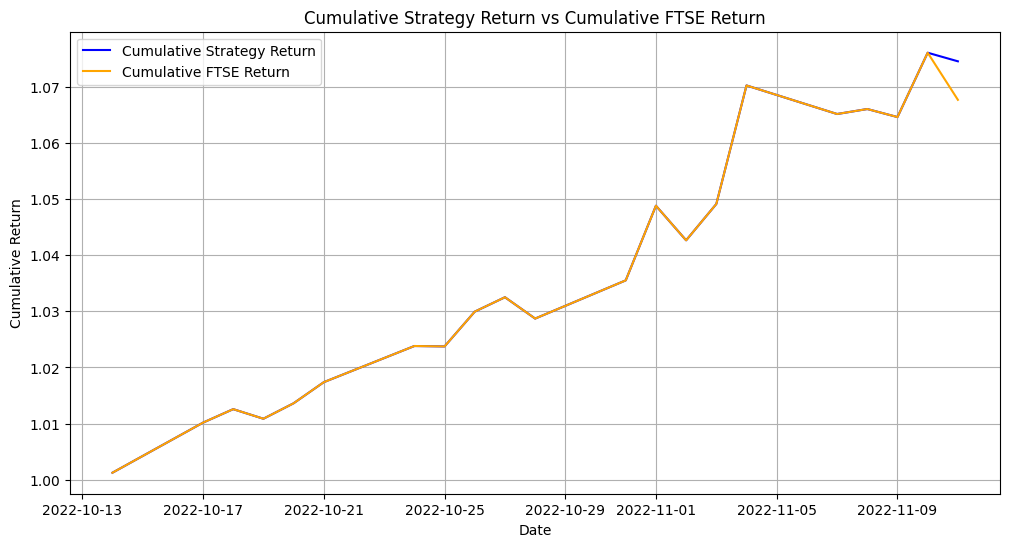

In [33]:
rolling_z_score['cumulative_ftse_return'] = (1 + FTSE_log_return.loc[pca_date:end_date]).cumprod()

# Plot the cumulative strategy return and cumulative FTSE return
plt.figure(figsize=(12, 6))
plt.plot(rolling_z_score.index, rolling_z_score['cumulative_return'], label='Cumulative Strategy Return', color='blue')
plt.plot(rolling_z_score.index, rolling_z_score['cumulative_ftse_return'], label='Cumulative FTSE Return', color='orange')
plt.title('Cumulative Strategy Return vs Cumulative FTSE Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.show()

# Creating Functions of Code

In [34]:
def rolling_pca_weights(X_log, n_stocks, window, n_pcs, pca_date):
    """
    Compute PCA-based portfolio weights for a specific date.

    Parameters:
    - X_log: DataFrame of log returns
    - n_stocks: Number of top stocks to select each window
    - window: Number of trading days per rolling window
    - n_pcs: Number of principal components to sum
    - pca_date: Date (as string or Timestamp) to compute weights for

    Returns:
    - rep_pf: DataFrame with stocks as columns and weights as the values
    """

    # Initialize
    dates = X_log.index[window:]
    summed_pcs_full = {}

    # Rolling PCA computation
    def compute_rolling_pca(window_start):
        pca_roll = PCA()
        window_data = X_log.iloc[window_start:window_start + window - 1, :]
        pca_roll.fit(window_data)
        loadings_matrix = pca_roll.components_.T
        summed_values = loadings_matrix[:, :n_pcs].sum(axis=1)
        summed_pcs_full[dates[window_start]] = pd.Series(summed_values, index=X_log.columns)

    # Run rolling PCA
    for start in range(len(X_log) - window):
        compute_rolling_pca(start)

    # Combine all summed PCs into DataFrame
    summed_pcs_full_df = pd.DataFrame(summed_pcs_full).T
    summed_pcs_full_df.index.name = "Date"

    # Check if requested date is available
    if pd.to_datetime(pca_date) not in summed_pcs_full_df.index:
        raise ValueError(f"The date {pca_date} is not available in the data.")

    # Calculate weights for the specified date
    daily_values = summed_pcs_full_df.loc[pd.to_datetime(pca_date)]
    top_stocks = daily_values.nlargest(n_stocks)
    portfolio_weights = top_stocks / top_stocks.sum()

    # Create a one-row DataFrame with stocks as columns and weights as the values
    rep_pf = pd.DataFrame([portfolio_weights.values], columns=portfolio_weights.index)

    return rep_pf

In [35]:
rep_pf

source_file,ANTO,BA,BP,FCIT,GLEN,IHG,IMB,RKT,SHEL,ULVR
Date,,,,,,,,,,
2022-10-14,0.082255,0.121278,0.111058,0.102659,0.093956,0.098008,0.076567,0.089343,0.127707,0.09717


In [36]:
def strategy_returns(rep_pf, log_returns, FTSE_prices, pca_date, window, z_window):
    """
    Computes strategy returns based on PCA-replicated portfolio and z-score based trading signals.
    
    Parameters:
    - rep_pf: DataFrame with portfolio weights on pca_date
    - log_returns: Full DataFrame of log returns
    - FTSE_prices: Series of FTSE prices
    - pca_date: Date for PCA weights (string or datetime)
    - end_days: How many days after pca_date to calculate returns
    - z_window: Rolling window for z-score
    
    Returns:
    - Tuple of DataFrame with strategy performance and a metrics comparison DataFrame
    """
    
    # 1. Calculate daily log returns of replication portfolio
    rep_pf_log_returns_daily = log_returns[rep_pf.columns]
    rep_pf_results = rep_pf_log_returns_daily.mul(rep_pf.iloc[0], axis=1)
    rep_pf_results["total_rep_pf"] = rep_pf_results.sum(axis=1)
    
    # 2. Calculate FTSE log returns
    FTSE_log_return = np.log(FTSE_prices / FTSE_prices.shift(1)).dropna()
    
    # 3. Compute spread
    spread_df = pd.DataFrame()
    spread_df["spread"] = FTSE_log_return - rep_pf_results["total_rep_pf"]
    
    # 4. Rolling z-score calculation
    spread_df['z_score'] = (
        spread_df['spread']
        .rolling(window=z_window, min_periods=z_window, closed='both')
        .apply(lambda x: zscore(x)[-1] if len(x) > 1 else 0, raw=False)
    )
    
    # 5. Filter relevant date range
    end_date = pd.to_datetime(pca_date) + pd.Timedelta(days=window)
    rolling_z_score = spread_df.loc[pca_date:end_date]
    
    # 6. Trading logic
    rolling_z_score['trade_signal'] = 0
    current_position = 0
    
    for i in range(len(rolling_z_score)):
        z = rolling_z_score.iloc[i]['z_score']

        if current_position == 0:
            if z < -2:
                current_position = 1  # Long FTSE
            elif z > 2:
                current_position = -1  # Short FTSE
        elif current_position == 1:
            if z > -0.5:
                current_position = 0
        elif current_position == -1:
            if z < 0.5:
                current_position = 0

        rolling_z_score.iloc[i, rolling_z_score.columns.get_loc('trade_signal')] = current_position
    
    # 7. Shift signal to apply on next day
    rolling_z_score['shifted_signal'] = rolling_z_score['trade_signal'].shift(1)
    
    # 8. Calculate strategy return
    ftse_returns = FTSE_log_return.loc[pca_date:end_date]
    rep_pf_returns = rep_pf_results["total_rep_pf"].loc[pca_date:end_date]
    
    rolling_z_score['strategy_return'] = np.where(
        rolling_z_score['shifted_signal'] == 1,
        ftse_returns.values - rep_pf_returns.values,
        np.where(
            rolling_z_score['shifted_signal'] == -1,
            rep_pf_returns.values - ftse_returns.values,
            ftse_returns.values  # Hold FTSE
        )
    )
    
    # 9. Calculate cumulative returns
    rolling_z_score['cumulative_return'] = (1 + rolling_z_score['strategy_return']).cumprod()
    rolling_z_score['cumulative_ftse_return'] = (1 + ftse_returns).cumprod()
    
    # 10. Compute Performance Metrics
    total_strategy_return = rolling_z_score['cumulative_return'].iloc[-1] - 1
    total_ftse_return = rolling_z_score['cumulative_ftse_return'].iloc[-1] - 1
    
    annualized_strategy_return = ((1 + total_strategy_return) ** (252 / len(rolling_z_score))) - 1
    annualized_ftse_return = ((1 + total_ftse_return) ** (252 / len(rolling_z_score))) - 1

    strategy_volatility = rolling_z_score['strategy_return'].std() * np.sqrt(252)
    ftse_volatility = ftse_returns.std() * np.sqrt(252)

    # Sharpe ratio assumes a risk-free rate of 0 for simplicity
    strategy_sharpe = annualized_strategy_return / strategy_volatility
    ftse_sharpe = annualized_ftse_return / ftse_volatility
    
    # Create Metrics DataFrame with the desired format
    metrics_df = pd.DataFrame({
        "Replication Strategy": [
            total_strategy_return * 100,
            annualized_strategy_return * 100,
            strategy_volatility * 100,
            strategy_sharpe
        ],
        "FTSE": [
            total_ftse_return * 100,
            annualized_ftse_return * 100,
            ftse_volatility * 100,
            ftse_sharpe
        ]
    }, index=[
        "Total Return (%)",
        "Annualized Return (%)",
        "Volatility (%)",
        "Sharpe Ratio"
    ])

    # 11. Plot Cumulative Returns
    plt.figure(figsize=(12, 6))
    plt.plot(rolling_z_score.index, rolling_z_score['cumulative_return'], label='Strategy Return', color='blue')
    plt.plot(rolling_z_score.index, rolling_z_score['cumulative_ftse_return'], label='FTSE Return', color='orange')
    plt.title('Cumulative Strategy Return vs FTSE Return')
    plt.legend()
    plt.grid()
    plt.show()
    
    return rolling_z_score, metrics_df

In [50]:
# Define input variables
n_stocks = 30
window = 30 # period the trading strat goes
n_pcs = 3
pca_date = '2023-06-16'
z_window=60 # to calc z score

# Get weights
rep_pf = rolling_pca_weights(X_log, n_stocks, window, n_pcs, pca_date)

/tmp/ipykernel_31504/1389535657.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rolling_z_score['trade_signal'] = 0
/tmp/ipykernel_31504/1389535657.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rolling_z_score['shifted_signal'] = rolling_z_score['trade_signal'].shift(1)
/tmp/ipykernel_31504/1389535657.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

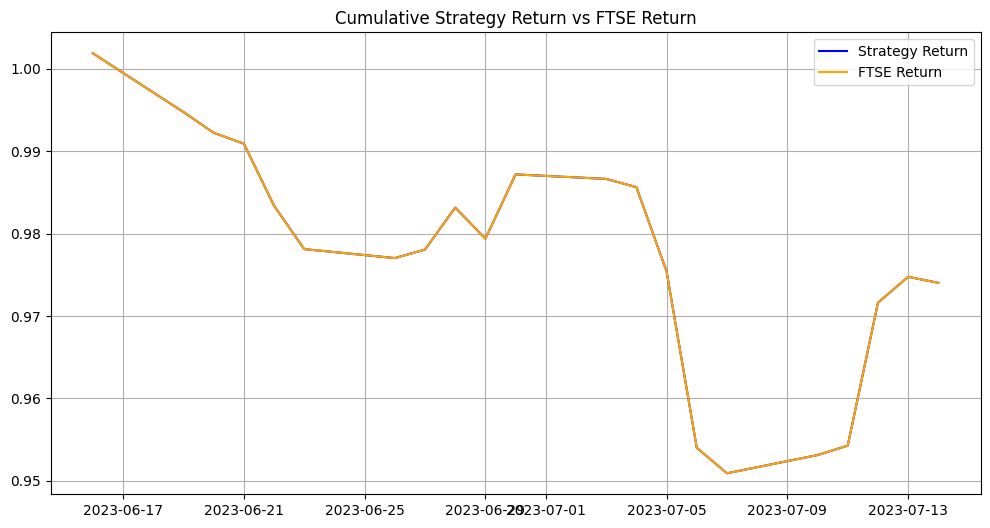

,Replication Strategy,FTSE
Total Return (%),-2.598209,-2.598209
Annualized Return (%),-27.087279,-27.087279
Volatility (%),12.167901,12.167901
Sharpe Ratio,-2.226126,-2.226126


In [51]:
rolling_z_score, metrics_df = strategy_returns(rep_pf, log_returns, df["FTSE100"], pca_date, window, z_window)
metrics_df

Check for optimal parameters

In [39]:
#import itertools

# Define ranges for input variables
n_stocks_range = range(40,51, 10)  # From 10 to 60 in steps of 10
window_range = range(40, 61, 20)   # From 40 to 100 in steps of 10
n_pcs_range = range(1, 4,1)          # From 1 to 20
benchmark_dates = ['2023-06-01', '2023-12-01', '2024-03-01']  # Dates to evaluate

# Initialize a list to store results
global_results = []

# Iterate through all combinations of n_stocks, window, and n_pcs
#for n_stocks, window, n_pcs in itertools.product(n_stocks_range, window_range, n_pcs_range):
    try:
        # Initialize performance metrics across all benchmark dates
        date_results = []
        
        for pca_date in benchmark_dates:
            try:
                # Step 1: Generate portfolio weights
                rep_pf = rolling_pca_weights(X_log, n_stocks, window, n_pcs, pca_date)
                
                # Step 2: Evaluate strategy returns
                rolling_z_score, metrics_df = strategy_returns(rep_pf, log_returns, df["FTSE100"], pca_date, window, z_window)
                
                # Step 3: Extract total returns for this date
                total_strategy_return = metrics_df.loc["Total Return (%)", "Replication Strategy"]
                total_ftse_return = metrics_df.loc["Total Return (%)", "FTSE"]
                return_diff = total_strategy_return - total_ftse_return
                
                # Append the result for this date
                date_results.append(return_diff)
            
            except Exception as e:
                # Catch errors for this specific date
                print(f"Error for date {pca_date} with n_stocks={n_stocks}, window={window}, n_pcs={n_pcs}: {e}")
        
        # Aggregate results across all dates
        if date_results:
            avg_return_diff = sum(date_results) / len(date_results)  # Mean difference
            global_results.append({
                "n_stocks": n_stocks,
                "window": window,
                "n_pcs": n_pcs,
                "avg_return_diff (%)": avg_return_diff
            })

    except Exception as e:
        # Catch errors for parameter combination
        print(f"Error for combination n_stocks={n_stocks}, window={window}, n_pcs={n_pcs}: {e}")

# Convert global results to a DataFrame
global_results_df = pd.DataFrame(global_results)

# Identify the best combination
best_global_result = global_results_df.loc[global_results_df['avg_return_diff (%)'].idxmax()]

# Display the best parameters
print("Best Combination Across All Dates:")
print(best_global_result)

# Display all results for visualization
print("\nAll Parameter Combinations and Their Average Performance:")
print(global_results_df)


IndentationError: unexpected indent (1615353553.py, line 14)

In [ ]:
global_results_df

# Predicting Spread with LSTM / NN

In [ ]:
import yfinance as yf

# 10-year Treasury yield (^TNX)
X_df = yf.download("^TNX", start="2022-06-29", end="2025-03-10")
print(X_df)


In [ ]:
X_df